In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dir_path = '/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos'

files = os.listdir(dir_path)
images_list = []

for file in files:
    img_path = os.path.join(dir_path, file)
    print(img_path)
    source = cv2.imread(img_path)
    images_list.append(source)

print(len(images_list))

/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_172939.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_173217.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_172655.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_182238.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_182432.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_181950.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_172624.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_181942.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_182001.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_182251.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_182003.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_182016.jpg
/home/nodyer/Área de Trabalho/TG Nodyer/TAG fotos/IMG_20230707_172558.jpg
/home/nodyer/Área de Trabalho/TG Nodye

In [97]:
# Carrega a imagem
scr = images_list[17]
img = np.copy(scr)

plt.imshow(cv2.cvtColor(scr, cv2.COLOR_BGR2RGB))
plt.show()

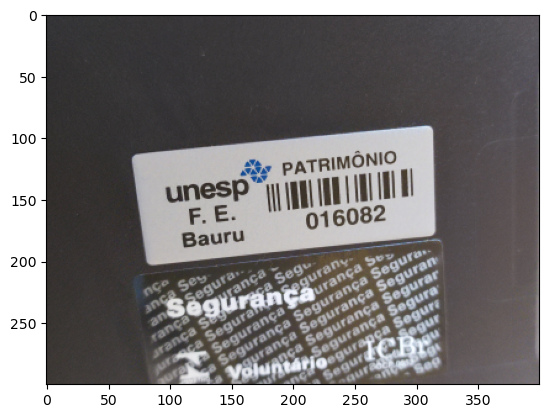

In [98]:
'''
mesmo bg: 4, 6, 11, 12, 13, 16, 22, 23, 24, 
cola na borda: 2, 15, 19
(é resolvido com thresh e maior aproximação dos polígonos)
'''

# Define a porcentagem de redimensionamento
percent = 10

# Calcula as novas dimensões da imagem
width = int(scr.shape[1] * percent / 100)
height = int(scr.shape[0] * percent / 100)

# Redimensiona a imagem
scr = cv2.resize(scr, (width, height), interpolation = cv2.INTER_AREA)

if height > width:
    scr = cv2.rotate(scr, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(cv2.cvtColor(scr, cv2.COLOR_BGR2RGB))
plt.show()

In [99]:
gray = cv2.cvtColor(scr, cv2.COLOR_BGR2GRAY)

#Exibe a imagem
plt.imshow(gray, 'gray')
plt.show()

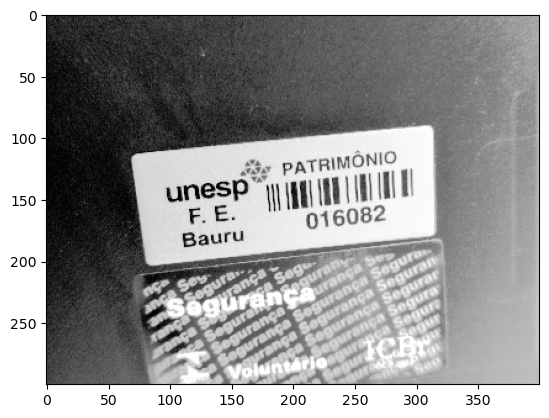

In [100]:
equ = cv2.equalizeHist(gray)
#Exibe a imagem
plt.imshow(equ, 'gray')
plt.show()

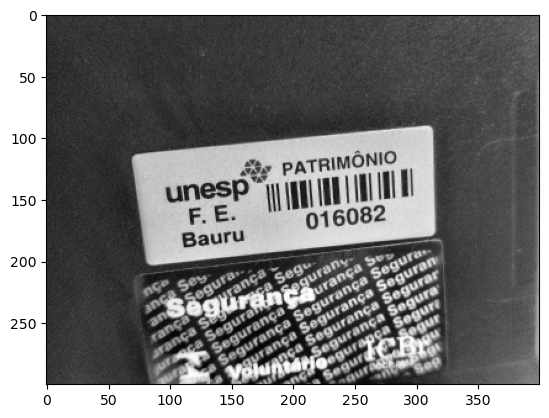

In [101]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(gray)

plt.imshow(cl, 'gray')
plt.show()

In [102]:
bfilter = cv2.bilateralFilter(gray,9,75,75) #(img, diametro do filtro, )

#Exibe a imagem
plt.imshow(bfilter, 'gray')
plt.show()

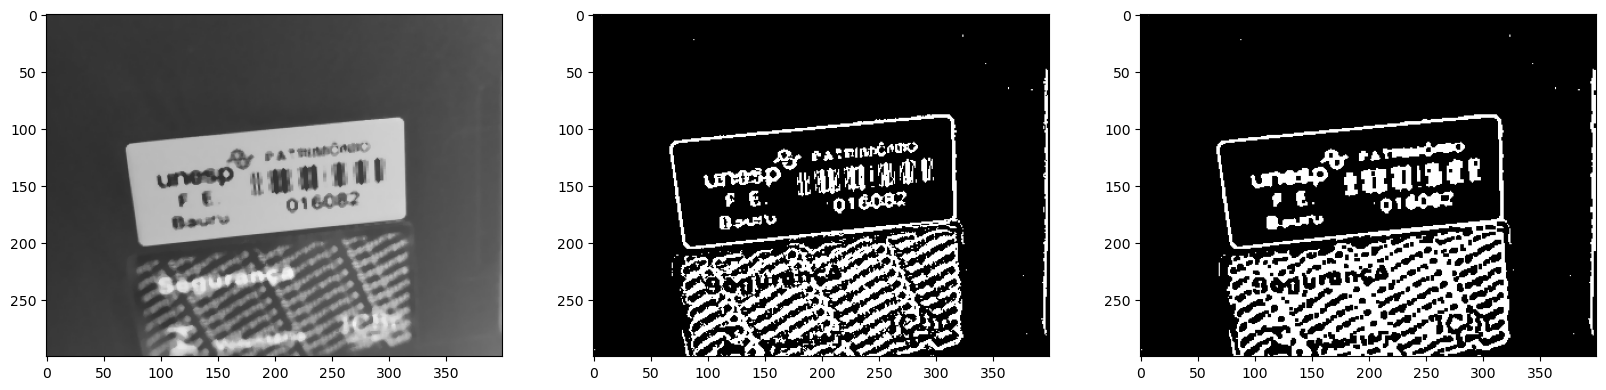

In [103]:
blur = cv2.medianBlur(gray, 5)
adaptive_threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 2)
kernel = np.ones((3, 3), np.uint8) 
opening_image = cv2.morphologyEx(adaptive_threshold, cv2.MORPH_CLOSE, kernel)

#Exibe a imagem
plt.figure(figsize=(20,5))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2), plt.imshow(adaptive_threshold, 'gray')
plt.subplot(1,3,3), plt.imshow(opening_image, 'gray')
plt.show()

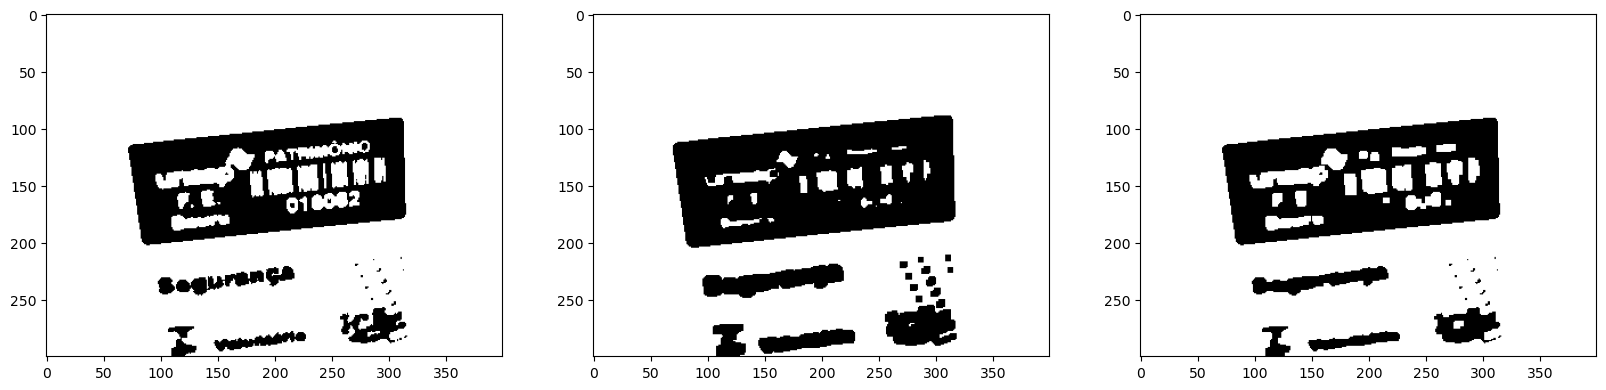

In [104]:
ret,th1 = cv2.threshold(bfilter,170,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8) 
img_erosion = cv2.erode(th1, kernel, iterations=1) 
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1) 

plt.figure(figsize=(20,5))
plt.subplot(1,3,1), plt.imshow(th1, 'gray')
plt.subplot(1,3,2), plt.imshow(img_erosion, 'gray')
plt.subplot(1,3,3), plt.imshow(img_dilation, 'gray')
plt.show()

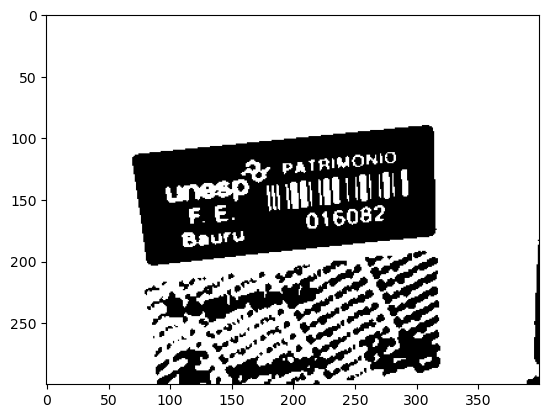

In [105]:
blur = cv2.GaussianBlur(cl, (5, 5), 0)
_, thresh = cv2.threshold(blur,0,180,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#Exibe a imagem
plt.imshow(thresh, 'gray')
plt.show()

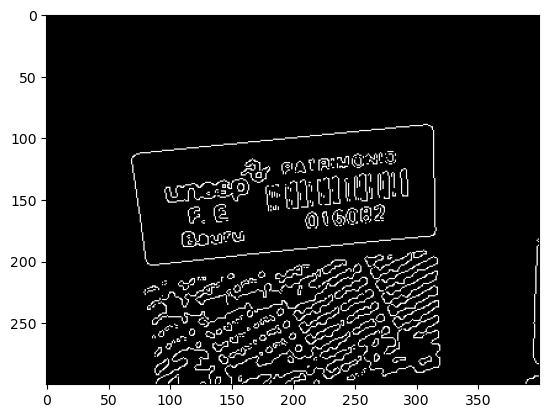

In [106]:
edge2 = cv2.Canny(thresh, 30, 200)

#Exibe a imagem
plt.imshow(edge2, 'gray')
plt.show()

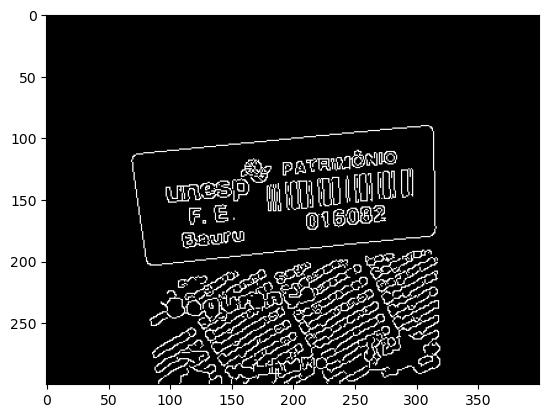

In [107]:
edge = cv2.Canny(bfilter, 30, 200)

#Exibe a imagem
plt.imshow(edge, 'gray')
plt.show()

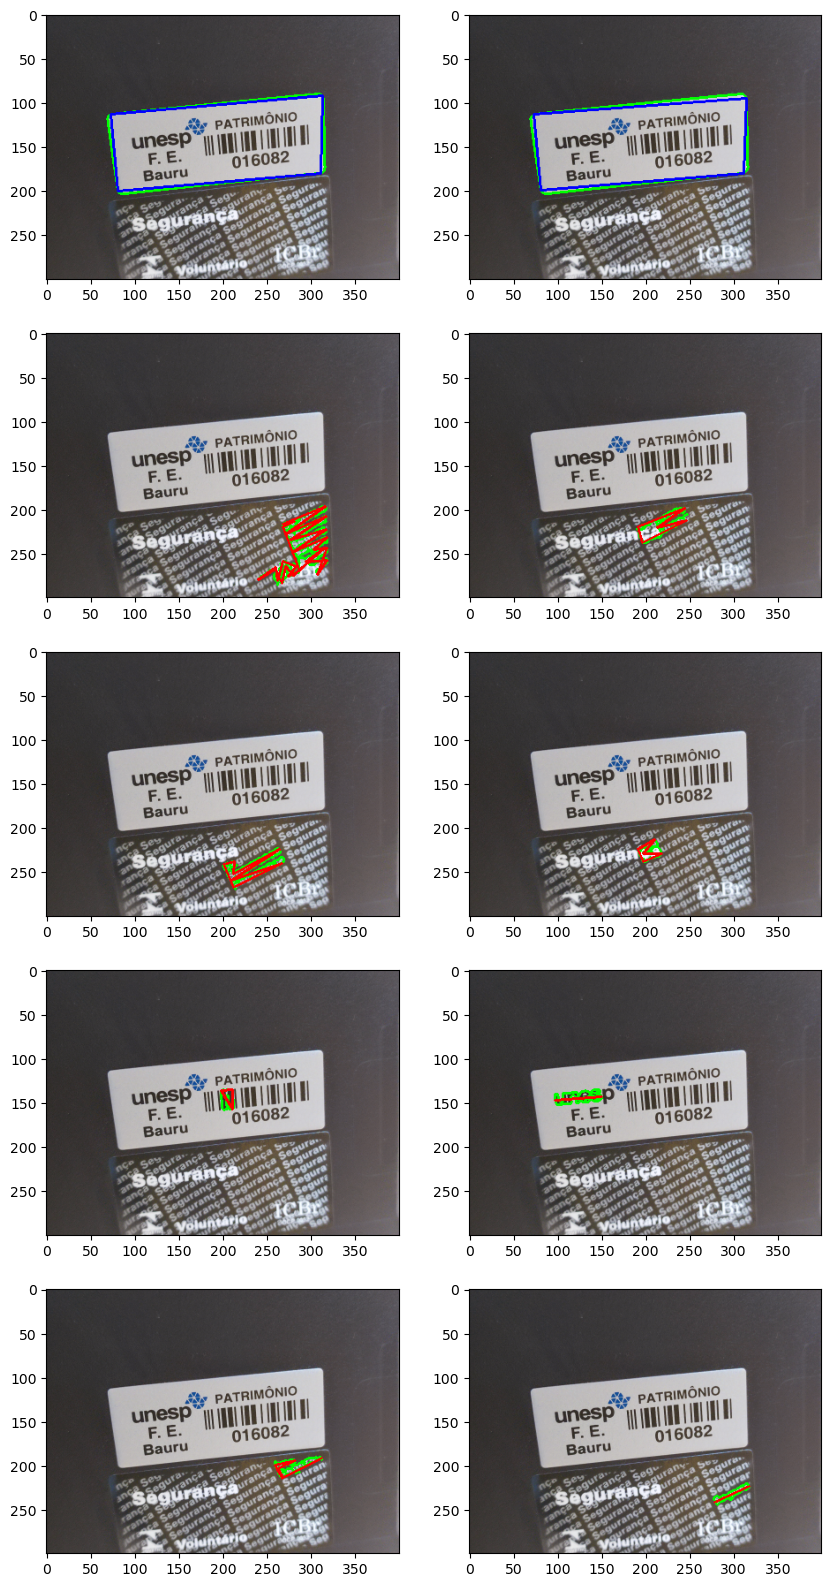

In [108]:
contours, _ = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

draw = np.copy(scr)
i=1
x=1
plt.figure(figsize=(10,20))

for c in contours:
    approx = cv2.approxPolyDP(c, 10, True)
    cv2.drawContours(draw, c, -1, (0, 255, 0), 2)
    cv2.drawContours(draw, [approx], -1, (0, 0, 255), 2)
    if len(approx) == 4:
        cv2.drawContours(draw, [approx], -1, (255, 0, 0), 2)
    plt.subplot(5,2,i)
    plt.imshow(cv2.cvtColor(draw, cv2.COLOR_BGR2RGB))
    draw = np.copy(scr)
    i+=1
plt.show()

In [109]:
location = None

for c in contours:
    approx = cv2.approxPolyDP(c, 10, True)

    if len(approx) == 4:
        location = approx
        break

In [110]:
location

array([[[313,  92]],

       [[ 73, 113]],

       [[ 81, 200]],

       [[311, 180]]], dtype=int32)

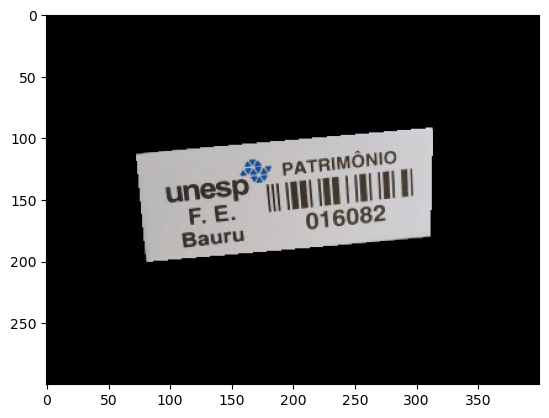

In [111]:
if location is not None:
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(scr, scr, mask=mask)

    #Exibe a imagem
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print('Placa não encontrada')

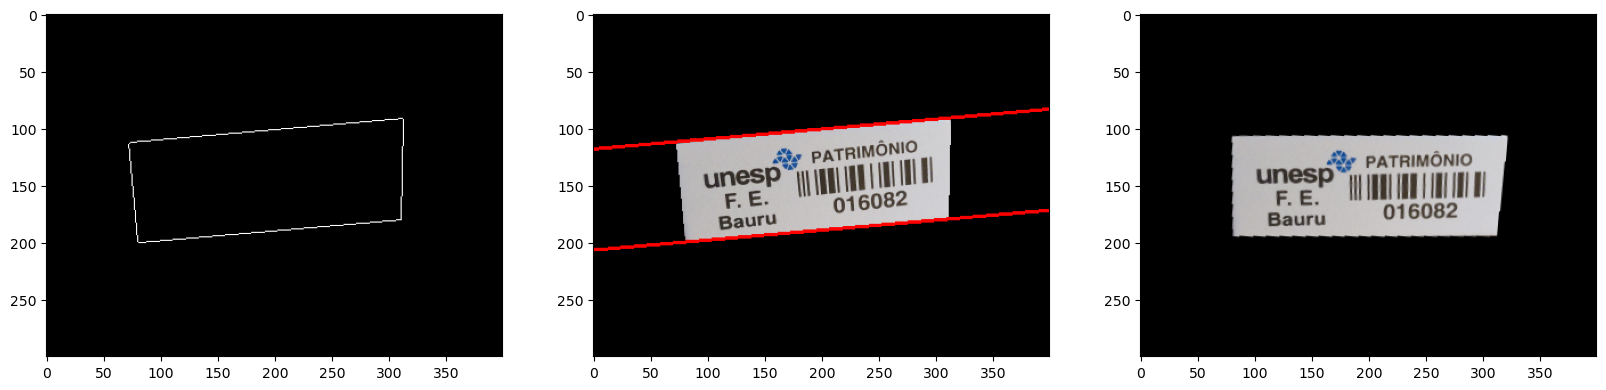

In [116]:
canny = cv2.Canny(mask,200,500,apertureSize = 3)
lines = cv2.HoughLines(canny,1,np.pi/180,100)
img_lines = np.copy(new_image)
theta_list = []

#Desenhando as linhas na imagem
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_lines,(x1,y1),(x2,y2),(0,0,255),2)
    theta_list.append(theta)

theta = sorted(theta_list)[0]
#Obtenção do angulo de rotação
angle = 360 - (90 - theta*(180/np.pi))
#Rotacionando a imagem
rotate = cv2.getRotationMatrix2D((new_image.shape[0]/2,new_image.shape[1]/2),angle,1)

rotate_img = cv2.warpAffine(new_image, rotate, dsize=(new_image.shape[1],new_image.shape[0]))
rotate_scr = cv2.warpAffine(scr, rotate, dsize=(scr.shape[1],scr.shape[0]))
rotate_gray = cv2.warpAffine(gray, rotate, dsize=(gray.shape[1],gray.shape[0]))
#rotate_high = cv2.warpAffine(img, rotate, dsize=(img.shape[1],img.shape[0]))

plt.figure(figsize=(20,10))
plt.subplot(1,3,1), plt.imshow(canny, 'gray')
plt.subplot(1,3,2), plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(rotate_img, cv2.COLOR_BGR2RGB))
plt.show()

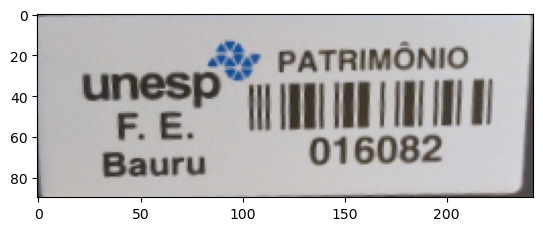

In [117]:
x,y,w,h = cv2.boundingRect(cv2.cvtColor(rotate_img, cv2.COLOR_BGR2GRAY))
cropped_image = rotate_gray[y:y+h,x:x+w]
cropped_for_res = rotate_scr[y:y+h,x:x+w]
plt.imshow(cv2.cvtColor(cropped_for_res, cv2.COLOR_BGR2RGB))
plt.show()

In [114]:
x = int(x / percent * 100)
y = int(y / percent * 100)
h = int(h / percent * 100)
w = int(w / percent * 100)

high = rotate_high[y:y+h,x:x+w]
plt.imshow(cv2.cvtColor(high, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'rotate_high' is not defined

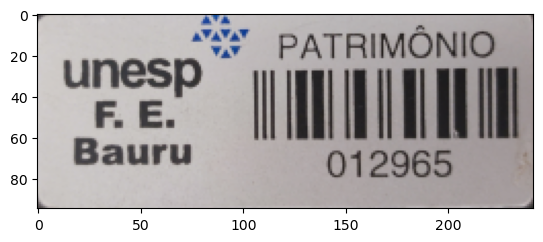

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))

# x1 = int(x1 / percent * 100)
# y1 = int(y1 / percent * 100)
# x2 = int(x2 / percent * 100)
# y2 = int(y2 / percent * 100)

cropped_image = gray[x1:x2+1, y1:y2+1]
cropped_for_res = scr[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_for_res, cv2.COLOR_BGR2RGB))
plt.show()

Rect(left=104, top=35, width=119, height=19)
Decoded data: 016082, Barcode type: I25


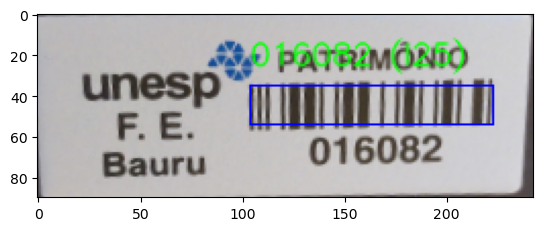

In [118]:
from pyzbar.pyzbar import decode

barcodes = decode(cropped_image)

if len(barcodes) == 0:
    print("Não foi possível ler o código de barra.")
else:
    draw_bar = np.copy(cropped_for_res)

    for barcode in barcodes:
        # Extrai as coordenadas do retângulo que envolve o código de barras
        (x, y, w, h) = barcode.rect
        print(barcode.rect)
    
    if w < 2:
        w = cropped_for_res.shape[1]
        x = cropped_for_res.shape[1] // 2
        print("Desenho adaptado.")

    # Desenha o retângulo ao redor do código de barras na imagem original
    cv2.rectangle(draw_bar, (x, y), (x + w, y + h), (255, 0, 0), 1)
    
    # Decodifica o dado do código de barras e o tipo de código de barras
    barcode_data = barcode.data.decode("utf-8")
    barcode_type = barcode.type
    
    # Exibe as informações do código de barras na imagem
    text = "{} ({})".format(barcode_data, barcode_type)
    cv2.putText(draw_bar, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, lineType=cv2.LINE_AA)
    
    # Exibe as informações do código de barras no terminal
    print("Decoded data: {}, Barcode type: {}".format(barcode_data, barcode_type))

    plt.imshow(cv2.cvtColor(draw_bar, cv2.COLOR_BGR2RGB))
    plt.show()

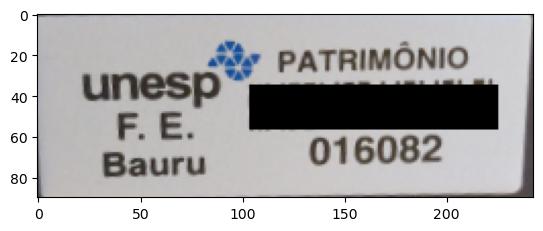

In [119]:
for barcode in barcodes:
    x, y, w, h = barcode.rect
    if w < 2:
        w = cropped_for_res.shape[0]//2
        x = cropped_for_res.shape[1]//2
    mask = np.zeros(cropped_image.shape, dtype=np.uint8)
    cv2.rectangle(mask, (x, y), (x + w + 2, y + h + 2), 255, -1)
    image_without_barcode = cv2.bitwise_and(cropped_for_res, cropped_for_res, mask=cv2.bitwise_not(mask))
    
plt.imshow(cv2.cvtColor(image_without_barcode, cv2.COLOR_BGR2RGB))
plt.show()

In [120]:
import easyocr

reader = easyocr.Reader(['pt'])
result = reader.readtext(image_without_barcode)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[113, 8], [216, 8], [216, 34], [113, 34]],
  'PATRIMÔNIO',
  0.9901452656667801),
 ([[18, 24], [94, 24], [94, 48], [18, 48]], 'unesp', 0.9999907770163853),
 ([[35, 45], [75, 45], [75, 65], [35, 65]], 'FE', 0.946683454595562),
 ([[31, 67], [85, 67], [85, 83], [31, 83]], 'Bauru', 0.9999814473984674),
 ([[131, 57], [201, 57], [201, 77], [131, 77]], '016082', 0.9633616091429369)]

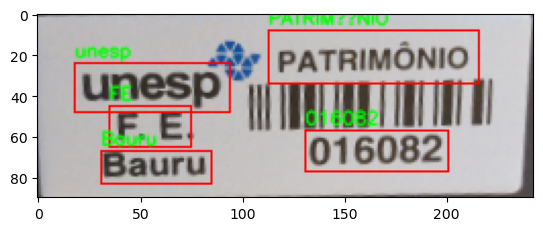

In [121]:
copy_scr = np.copy(cropped_for_res)

for r in result:
    text = r[-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(copy_scr, text=text, org=(r[0][0][0], r[0][0][1] - 3), fontFace=font, fontScale=0.3, color=(0,255,0), thickness=1, lineType=cv2.LINE_AA)
    res = cv2.rectangle(copy_scr, tuple(r[0][0]), tuple(r[0][2]), (0,0,255), 1)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()